# Unit 5 - Financial Planning

In [225]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [226]:
pwd

'C:\\Users\\ChrisKwit\\Desktop\\Penn_LPS\\upenn-phi-virt-fin-pt-08-2021-u-c-master\\05-APIs\\Homework\\Starter_Code'

In [227]:
# Load .env enviroment variables
load_dotenv("../../alpaca_nasdaq.env")


True

## Part 1 - Personal Finance Planner

In [228]:
### Collect Crypto Prices Using the `requests` Library

In [229]:
# Set current amount of crypto asset
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [230]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [231]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_current = requests.get(btc_url).json()
btc_value = btc_current["data"]["1"]["quotes"]["USD"]["price"]

# Fetch current ETH price
# YOUR CODE HERE!
eth_current = requests.get(eth_url).json()
eth_value = eth_current["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = my_btc * btc_value
my_eth_value = my_eth * eth_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $74875.20
The current value of your 5.3 ETH is $23273.36


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [232]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [233]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv('ALPACA_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [234]:
# Format current date as ISO format
# YOUR CODE HERE!
current_date = pd.Timestamp("2021-10-29", tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
portfolio_current = alpaca.get_barset(
    tickers,
    timeframe,
    start = current_date,
    end = current_date,
    limit = 1000
).df

# Preview DataFrame
# YOUR CODE HERE!
portfolio_current

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-10-29 00:00:00-04:00  114.35  114.78  114.35  114.62  7051614  455.87   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-29 00:00:00-04:00  459.56  455.56  459.22  58813207

In [235]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = portfolio_current['AGG']['close'][0]
spy_close_price = portfolio_current['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.62
Current SPY closing price: $459.22


In [236]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22961.00
The current value of your 200 AGG shares is $22924.00


### Savings Health Analysis

In [237]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
savings = [crypto, shares] 

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings, columns=["amount"], index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,98148.56
shares,45885.00


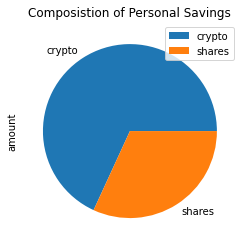

In [266]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Composistion of Personal Savings");

In [239]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = crypto + shares

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("You have reached your goal, but more is always better!")
else:
    print(f"You have ${(emergency_fund - total_savings):0.2f} until you reach your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [240]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-10-29', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-10-29', tz='America/New_York').isoformat()

In [241]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df

# Display sample data
df_stock_data.head()

AGG                                         SPY  \
                             open    high     low    close     volume    open   
time                                                                            
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0     NaN   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0  257.73   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0  257.73   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0  257.32   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310.0  257.40   

                                                                 
                               high     low   close      volume  
time                                                             
2017-11-08 00:00:00-05:00       NaN     NaN     NaN         NaN  
2017-11-09 00:00:00-05:00  258.3900  256.36  258.20  75322217.0  
2017-11-10 00:00:00-05:00  258.2100  257.37  258.08  35755951.0  
2017-11-13 00:00:00-05:00  258.5900  257.27  258.34  31963013.0  
2017-11-14 00:00:00-05:00  258.3581  256.52  257.75  41935632.0

In [242]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
    )

In [243]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-11-08 00:00:00-05:00          NaN     NaN       NaN     NaN     NaN   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.3900  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.2100  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.5900  257.27  258.34   
2017-11-14 00:00:00-05:00     0.001147  257.40  258.3581  256.52  257.75   

                                                    
                               volume daily_return  
time                                                
2017-11-08 00:00:00-05:00         NaN          NaN  
2017-11-09 00:00:00-05:00  75322217.0          NaN  
2017-11-10 00:00:00-05:00  35755951.0    -0.000465  
2017-11-13 00:00:00-05:00  31963013.0     0.001007  
2017-11-14 00:00:00-05:00  41935632.0    -0.002284

In [252]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ChrisKwit\Desktop\Penn_LPS\upenn-phi-virt-fin-pt-08-2021-u-c-master\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006862,0.995324,1.006649,0.996677,1.002963,0.991441,0.996820,1.013598,1.001253,0.991705,...,1.008350,1.010291,0.999682,1.001517,1.003766,1.005865,0.993829,0.992915,0.995623,0.997870
2,1.009313,1.001825,1.008802,0.997489,1.007522,0.986497,0.993036,1.014487,1.001928,1.004408,...,1.006678,1.005045,1.002132,1.003956,1.007727,1.003359,0.993677,0.999149,0.983297,1.000571
3,1.006646,1.010789,1.008734,1.002513,1.002358,0.983701,0.994219,1.013538,1.015223,1.011923,...,1.007516,1.001094,0.994895,0.999297,1.000939,1.003138,0.986871,0.996998,0.980184,1.008846
4,0.998571,1.016782,1.010029,1.001673,0.995556,0.981599,0.995880,1.025270,1.007876,1.006689,...,1.011608,1.009078,0.996000,0.999700,0.997284,1.011277,0.991440,0.996666,0.989391,1.015943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.225151,13.081261,7.131109,14.009743,17.469268,4.267578,4.162352,7.933905,10.832035,5.617925,...,13.447545,8.717404,8.547545,10.404520,7.505293,7.630176,7.231625,13.935395,11.047585,10.250751
7557,5.236330,13.008029,7.026439,13.877467,17.388187,4.287898,4.157319,7.929064,10.798273,5.640116,...,13.454861,8.668030,8.625033,10.395875,7.472464,7.560495,7.211168,14.024167,11.015655,10.283236
7558,5.214570,13.104903,7.003983,13.923258,17.332911,4.279567,4.127338,7.921303,10.726476,5.613016,...,13.542293,8.691398,8.536810,10.404875,7.452440,7.531428,7.196746,13.991837,10.985825,10.356529
7559,5.204871,13.248459,7.050914,13.834864,17.211601,4.305392,4.126657,7.911678,10.756959,5.651238,...,13.527768,8.753188,8.476659,10.486636,7.416377,7.523340,7.188368,14.100260,11.034103,10.421788


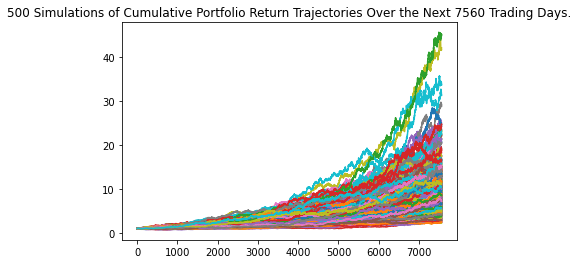

In [265]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyear.plot_simulation()

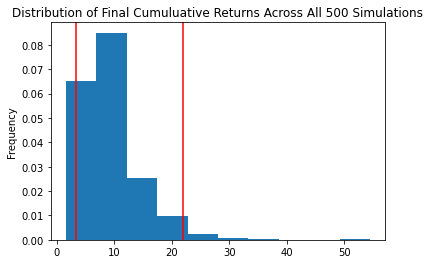

In [246]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [204]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
statistics = MC_thirtyyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(statistics)

count           500.000000
mean              9.096960
std               4.640273
min               2.146075
25%               5.693929
50%               8.008315
75%              11.112772
max              33.926207
95% CI Lower      3.257416
95% CI Upper     20.465312
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [206]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(statistics[8]*initial_investment,2)
ci_upper = round(statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $65148.33 and $409306.24


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [207]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(statistics[8]*initial_investment,2)
ci_upper = round(statistics[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $97722.49 and $613959.37


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [208]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
    )
MC_fiveyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-11-08 00:00:00-05:00          NaN     NaN       NaN     NaN     NaN   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.3900  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.2100  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.5900  257.27  258.34   
2017-11-14 00:00:00-05:00     0.001147  257.40  258.3581  256.52  257.75   

                                                    
                               volume daily_return  
time                                                
2017-11-08 00:00:00-05:00         NaN          NaN  
2017-11-09 00:00:00-05:00  75322217.0          NaN  
2017-11-10 00:00:00-05:00  35755951.0    -0.000465  
2017-11-13 00:00:00-05:00  31963013.0     0.001007  
2017-11-14 00:00:00-05:00  41935632.0    -0.002284

In [209]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ChrisKwit\Desktop\Penn_LPS\upenn-phi-virt-fin-pt-08-2021-u-c-master\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996404,0.996241,0.999462,1.001814,1.000155,0.999899,1.002314,0.989380,0.999211,1.000488,...,0.998550,1.001339,0.999221,1.002535,1.011100,1.008095,1.003094,1.006661,1.002035,0.993347
2,0.998713,0.997813,0.999420,0.995728,1.004994,1.007200,0.999155,0.993212,1.008159,1.003683,...,0.995944,1.000615,0.998048,1.009326,1.010945,1.011842,0.998784,1.008857,0.998666,0.994047
3,0.991559,1.008925,0.996822,0.990324,1.007287,1.006160,1.004795,0.992640,0.999735,1.007387,...,1.003321,1.005171,0.998172,1.001727,1.005772,1.020342,1.004889,1.017948,0.998363,0.990109
4,0.996191,1.002045,0.992422,0.990863,1.012850,1.003091,1.009844,0.990904,1.012410,1.007719,...,1.002932,1.008902,1.006405,0.999295,1.007395,1.031050,1.005660,1.020501,0.988971,0.988593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.388677,1.588674,1.212994,1.558003,1.215884,2.476659,1.549050,1.593605,1.434841,1.356479,...,1.814684,1.565186,1.218647,1.582644,1.378605,1.819961,0.990901,1.299869,2.019635,1.182534
1257,1.381863,1.589014,1.192208,1.562063,1.207907,2.472840,1.567933,1.592099,1.435855,1.348644,...,1.805048,1.558627,1.202897,1.580613,1.384003,1.831962,0.990767,1.307673,2.015495,1.191958
1258,1.392440,1.566205,1.195858,1.551907,1.204114,2.479834,1.584383,1.588480,1.425011,1.346424,...,1.823500,1.568602,1.198317,1.586491,1.373711,1.831009,0.995783,1.300415,2.017123,1.199158
1259,1.393331,1.567581,1.196396,1.551211,1.208577,2.489833,1.590948,1.592748,1.432420,1.344534,...,1.833493,1.564557,1.200654,1.585807,1.393172,1.827378,0.998170,1.301028,2.003943,1.191300


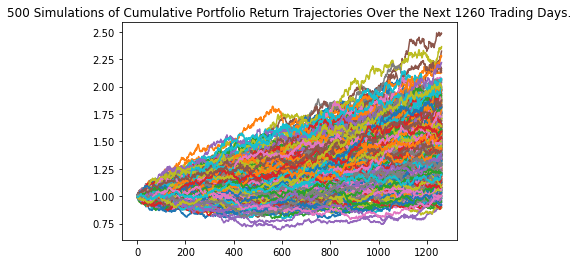

In [210]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_fiveyear = MC_fiveyear.plot_simulation()

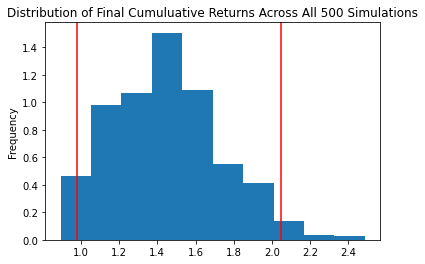

In [211]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_fiveyear = MC_fiveyear.plot_distribution()

In [212]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
statistics_fiveyear = MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(statistics_fiveyear)

count           500.000000
mean              1.450582
std               0.284943
min               0.893809
25%               1.236276
50%               1.439768
75%               1.607985
max               2.486118
95% CI Lower      0.980365
95% CI Upper      2.048212
Name: 1260, dtype: float64


In [213]:
# Set initial investment
# YOUR CODE HERE!
initial_fiveyear = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(statistics[8]*initial_fiveyear,2)
ci_upper_five = round(statistics[9]*initial_fiveyear,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $32574.16 and $204653.12


### Ten Years Retirement Option

In [214]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
    )
MC_tenyear.portfolio_data.head()

AGG                                      \
                             open    high     low    close     volume   
time                                                                    
2017-11-08 00:00:00-05:00  109.54  109.60  109.46  109.500  2228734.0   
2017-11-09 00:00:00-05:00  109.39  109.46  109.30  109.420  1941380.0   
2017-11-10 00:00:00-05:00  109.06  109.15  108.97  108.985  1488306.0   
2017-11-13 00:00:00-05:00  109.11  109.11  108.96  108.980  1677797.0   
2017-11-14 00:00:00-05:00  109.01  109.12  109.00  109.105  2663310.0   

                                           SPY                            \
                          daily_return    open      high     low   close   
time                                                                       
2017-11-08 00:00:00-05:00          NaN     NaN       NaN     NaN     NaN   
2017-11-09 00:00:00-05:00    -0.000731  257.73  258.3900  256.36  258.20   
2017-11-10 00:00:00-05:00    -0.003976  257.73  258.2100  257.37  258.08   
2017-11-13 00:00:00-05:00    -0.000046  257.32  258.5900  257.27  258.34   
2017-11-14 00:00:00-05:00     0.001147  257.40  258.3581  256.52  257.75   

                                                    
                               volume daily_return  
time                                                
2017-11-08 00:00:00-05:00         NaN          NaN  
2017-11-09 00:00:00-05:00  75322217.0          NaN  
2017-11-10 00:00:00-05:00  35755951.0    -0.000465  
2017-11-13 00:00:00-05:00  31963013.0     0.001007  
2017-11-14 00:00:00-05:00  41935632.0    -0.002284

In [215]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\ChrisKwit\Desktop\Penn_LPS\upenn-phi-virt-fin-pt-08-2021-u-c-master\05-APIs\Homework\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001909,0.996375,1.005563,1.001114,1.003417,1.003994,0.994968,1.005609,0.997610,1.006569,...,0.997402,0.998825,0.997059,0.991934,0.996776,0.997884,1.001985,0.990616,0.995235,1.002562
2,1.010266,1.004931,1.004298,1.001498,1.008531,1.005658,0.983721,1.013680,1.003053,0.998522,...,0.997420,0.996799,1.000919,1.000038,0.991326,1.004236,1.009387,0.995417,0.994357,1.001099
3,1.007147,1.008294,1.008974,1.010480,1.013534,0.998987,0.983437,1.021701,0.996623,0.993866,...,0.997785,1.003398,1.002841,1.001453,1.000622,0.994039,1.009934,1.004516,0.995420,1.003148
4,0.998588,1.011689,1.011577,0.999902,1.018537,0.983575,0.983545,1.024210,0.990475,1.001052,...,0.993215,1.003084,1.001380,1.005128,1.000057,0.998966,1.010507,1.000912,1.006207,0.995972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.447435,1.672189,2.232957,1.647857,2.095796,2.328992,2.411639,2.197712,1.710638,1.932534,...,1.193400,2.512138,1.965290,1.544107,2.654951,1.599687,1.844947,2.318219,2.854692,3.437220
2517,3.434560,1.678246,2.248609,1.645976,2.103977,2.311231,2.418336,2.190081,1.707024,1.920828,...,1.200678,2.513236,1.965477,1.543208,2.658687,1.579261,1.830253,2.328090,2.853467,3.412523
2518,3.420218,1.691452,2.252555,1.654708,2.090686,2.311074,2.409671,2.197918,1.717214,1.901396,...,1.188054,2.511652,1.960839,1.549969,2.648484,1.581671,1.835937,2.337864,2.848658,3.403744
2519,3.409311,1.684060,2.253204,1.658647,2.091589,2.316718,2.409103,2.213549,1.716741,1.891997,...,1.175014,2.500583,1.951996,1.536353,2.640016,1.570572,1.813700,2.352275,2.855609,3.343053


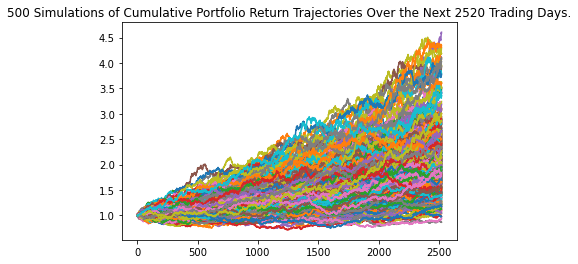

In [216]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_tenyear.plot_simulation()

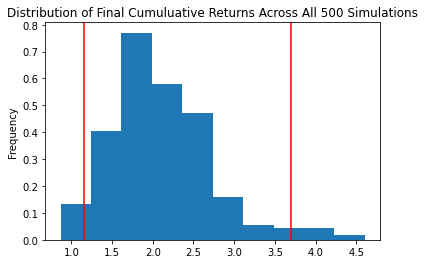

In [217]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_ten = MC_tenyear.plot_distribution()

In [218]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
statistics_tenyear = MC_tenyear.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(statistics_tenyear)

count           500.000000
mean              2.098312
std               0.617573
min               0.866091
25%               1.687443
50%               2.018753
75%               2.436635
max               4.605771
95% CI Lower      1.158140
95% CI Upper      3.700976
Name: 2520, dtype: float64


In [219]:
# Set initial investment
# YOUR CODE HERE!
initial_tenyear = 10000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(statistics_tenyear[8]*initial_tenyear, 2)
ci_upper_ten = round(statistics_tenyear[9]*initial_tenyear, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $11581.4 and $37009.76
